<a href="https://colab.research.google.com/github/SAIKUMAR918/Deep_Learning_Projects/blob/main/Autoencoders_Diabetes_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Performing Autoencoders on diabetes dataset

### Importing packages


In [1]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.utils import plot_model
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from matplotlib import pyplot
import pandas as pd

### Mounting Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Loading diabetes.csv file

In [3]:
df = pd.read_csv("/content/drive/My Drive/diabetes.csv")

### Displaying diabetes data set

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Displaying first five rows

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Displaying Last five rows

In [6]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


### Train-Test Split

In [7]:
X, y = df.drop('Outcome',axis=1) , df['Outcome']

# number of input columns
n_inputs = X.shape[1]
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,
                                                    random_state=1)

### Min-Max Scaler

In [8]:
# scale data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)

### Train autoencoder for classification with compression in the bottleneck layer

In [9]:
# define encoder
visible = Input(shape=(n_inputs,))

# encoder level 1
e = Dense(n_inputs*2)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)

# encoder level 2
e = Dense(n_inputs)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)

# bottleneck
n_bottleneck = 8
bottleneck = Dense(n_bottleneck)(e)

# define decoder, level 1
d = Dense(n_inputs)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)

# decoder level 2
d = Dense(n_inputs*2)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)

# output layer
output = Dense(n_inputs, activation='ReLU')(d)

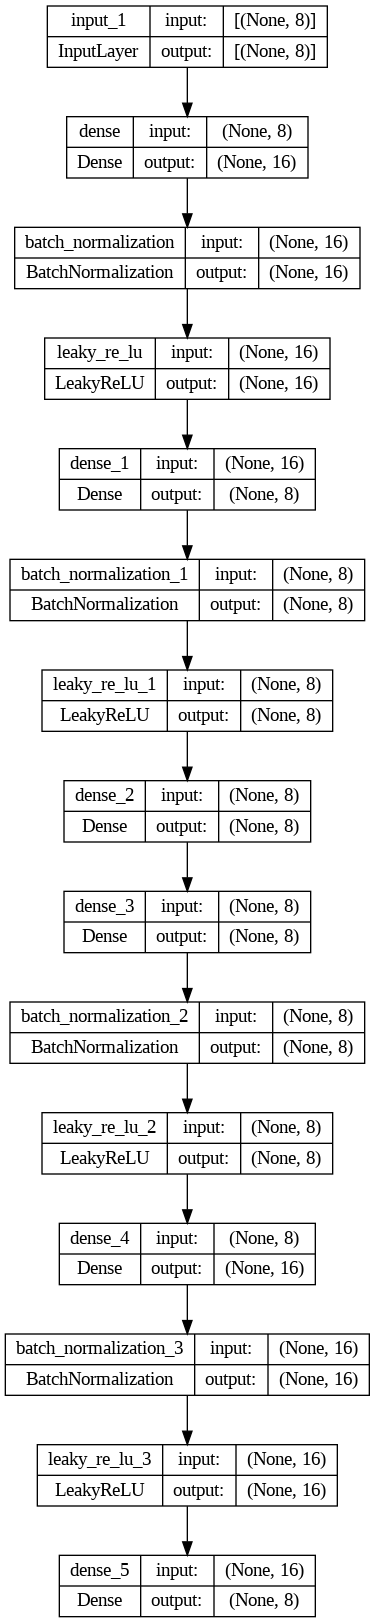

In [10]:
# define autoencoder model
model = Model(inputs=visible, outputs=output)

# compile autoencoder model
model.compile(optimizer='adam', loss='mse') # metrics=['accuracy']

# plot the autoencoder
plot_model(model, 'autoencoder_compress.png', show_shapes=True)

In [11]:
# fit the autoencoder model to reconstruct input
history = model.fit(X_train, X_train, epochs=200, batch_size=16,verbose=2, validation_data=(X_test,X_test))

Epoch 1/200
33/33 - 3s - loss: 0.3514 - val_loss: 0.1469 - 3s/epoch - 98ms/step
Epoch 2/200
33/33 - 0s - loss: 0.1682 - val_loss: 0.1311 - 244ms/epoch - 7ms/step
Epoch 3/200
33/33 - 0s - loss: 0.1181 - val_loss: 0.1015 - 252ms/epoch - 8ms/step
Epoch 4/200
33/33 - 0s - loss: 0.0937 - val_loss: 0.0734 - 235ms/epoch - 7ms/step
Epoch 5/200
33/33 - 0s - loss: 0.0837 - val_loss: 0.0600 - 252ms/epoch - 8ms/step
Epoch 6/200
33/33 - 0s - loss: 0.0732 - val_loss: 0.0492 - 209ms/epoch - 6ms/step
Epoch 7/200
33/33 - 0s - loss: 0.0624 - val_loss: 0.0408 - 249ms/epoch - 8ms/step
Epoch 8/200
33/33 - 0s - loss: 0.0548 - val_loss: 0.0382 - 241ms/epoch - 7ms/step
Epoch 9/200
33/33 - 0s - loss: 0.0504 - val_loss: 0.0371 - 235ms/epoch - 7ms/step
Epoch 10/200
33/33 - 0s - loss: 0.0472 - val_loss: 0.0351 - 204ms/epoch - 6ms/step
Epoch 11/200
33/33 - 0s - loss: 0.0441 - val_loss: 0.0336 - 272ms/epoch - 8ms/step
Epoch 12/200
33/33 - 0s - loss: 0.0415 - val_loss: 0.0324 - 241ms/epoch - 7ms/step
Epoch 13/200
33

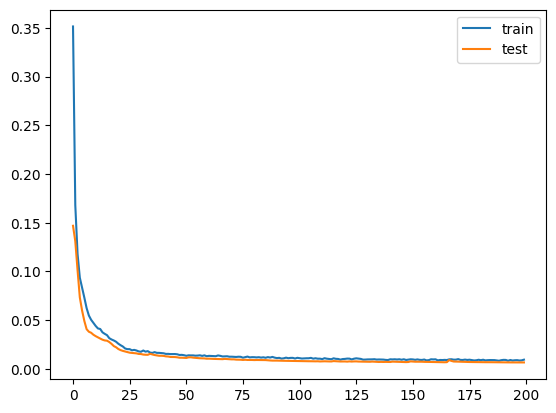

In [12]:
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [13]:
# define an encoder model (without the decoder)
encoder = Model(inputs=visible, outputs=bottleneck)
plot_model(encoder, 'encoder_compress.png', show_shapes=True)
# save the encoder to file
encoder.save('encoder.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Baseline in performance with logistic regression model


In [14]:
# define model
model = LogisticRegression()
# fit model on training set
model.fit(X_train, y_train)
# make prediction on test set
yhat = model.predict(X_test)
# calculate accuracy
acc = accuracy_score(y_test, yhat)
print(acc)

0.7755905511811023


In [15]:
# encode the train data
X_train_encode = encoder.predict(X_train)
# encode the test data
X_test_encode = encoder.predict(X_test)

8/8 [==============================] - 0s 2ms/step


In [16]:
#Dimensions of the array
X_train_encode.shape

(514, 8)

In [17]:
#Dimensions of the array
X_test_encode.shape

(254, 8)

In [18]:
# define the model
model = LogisticRegression()
# fit the model on the training set
model.fit(X_train_encode, y_train)
# make predictions on the test set
yhat = model.predict(X_test_encode)

In [19]:
# evaluate logistic regression on encoded input
# define the model
model = LogisticRegression()
# fit the model on the training set
model.fit(X_train_encode, y_train)
# make predictions on the test set
yhat = model.predict(X_test_encode)
# calculate classification accuracy
acc = accuracy_score(y_test, yhat)
print(acc)

0.7795275590551181
